In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('crop_yield.csv')

In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
df["Season"].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [7]:
df['Season'] = df['Season'].str.strip()

In [8]:
df.loc[df["Season"] == "Autumn", "Season"] = "Kharif"
df.loc[df["Season"] == "Winter", "Season"] = "Rabi"
df.loc[df["Season"] == "Summer", "Season"] = "Zaid"

In [9]:
df["Season"].value_counts()

Kharif        8646
Rabi          6131
Whole Year    3717
Zaid          1195
Name: Season, dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Convert Fertilizer and pesticide columns from kgs into tons

df['Fertilizer'] = df['Fertilizer'].apply(lambda x: x/1000)
df['Fertilizer'] = df['Fertilizer'].apply(lambda x: np.round(x,2))

df['Pesticide'] = df['Pesticide'].apply(lambda x: x/1000)
df['Pesticide'] = df['Pesticide'].apply(lambda x: np.round(x,2))

In [12]:
df['Yield'] = df['Yield'].apply(lambda x: np.round(x,2))

In [13]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024.88,22.88,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631.64,2.06,0.71
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75.76,0.25,0.24
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870.66,6.09,5238.05
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165.50,0.54,0.42


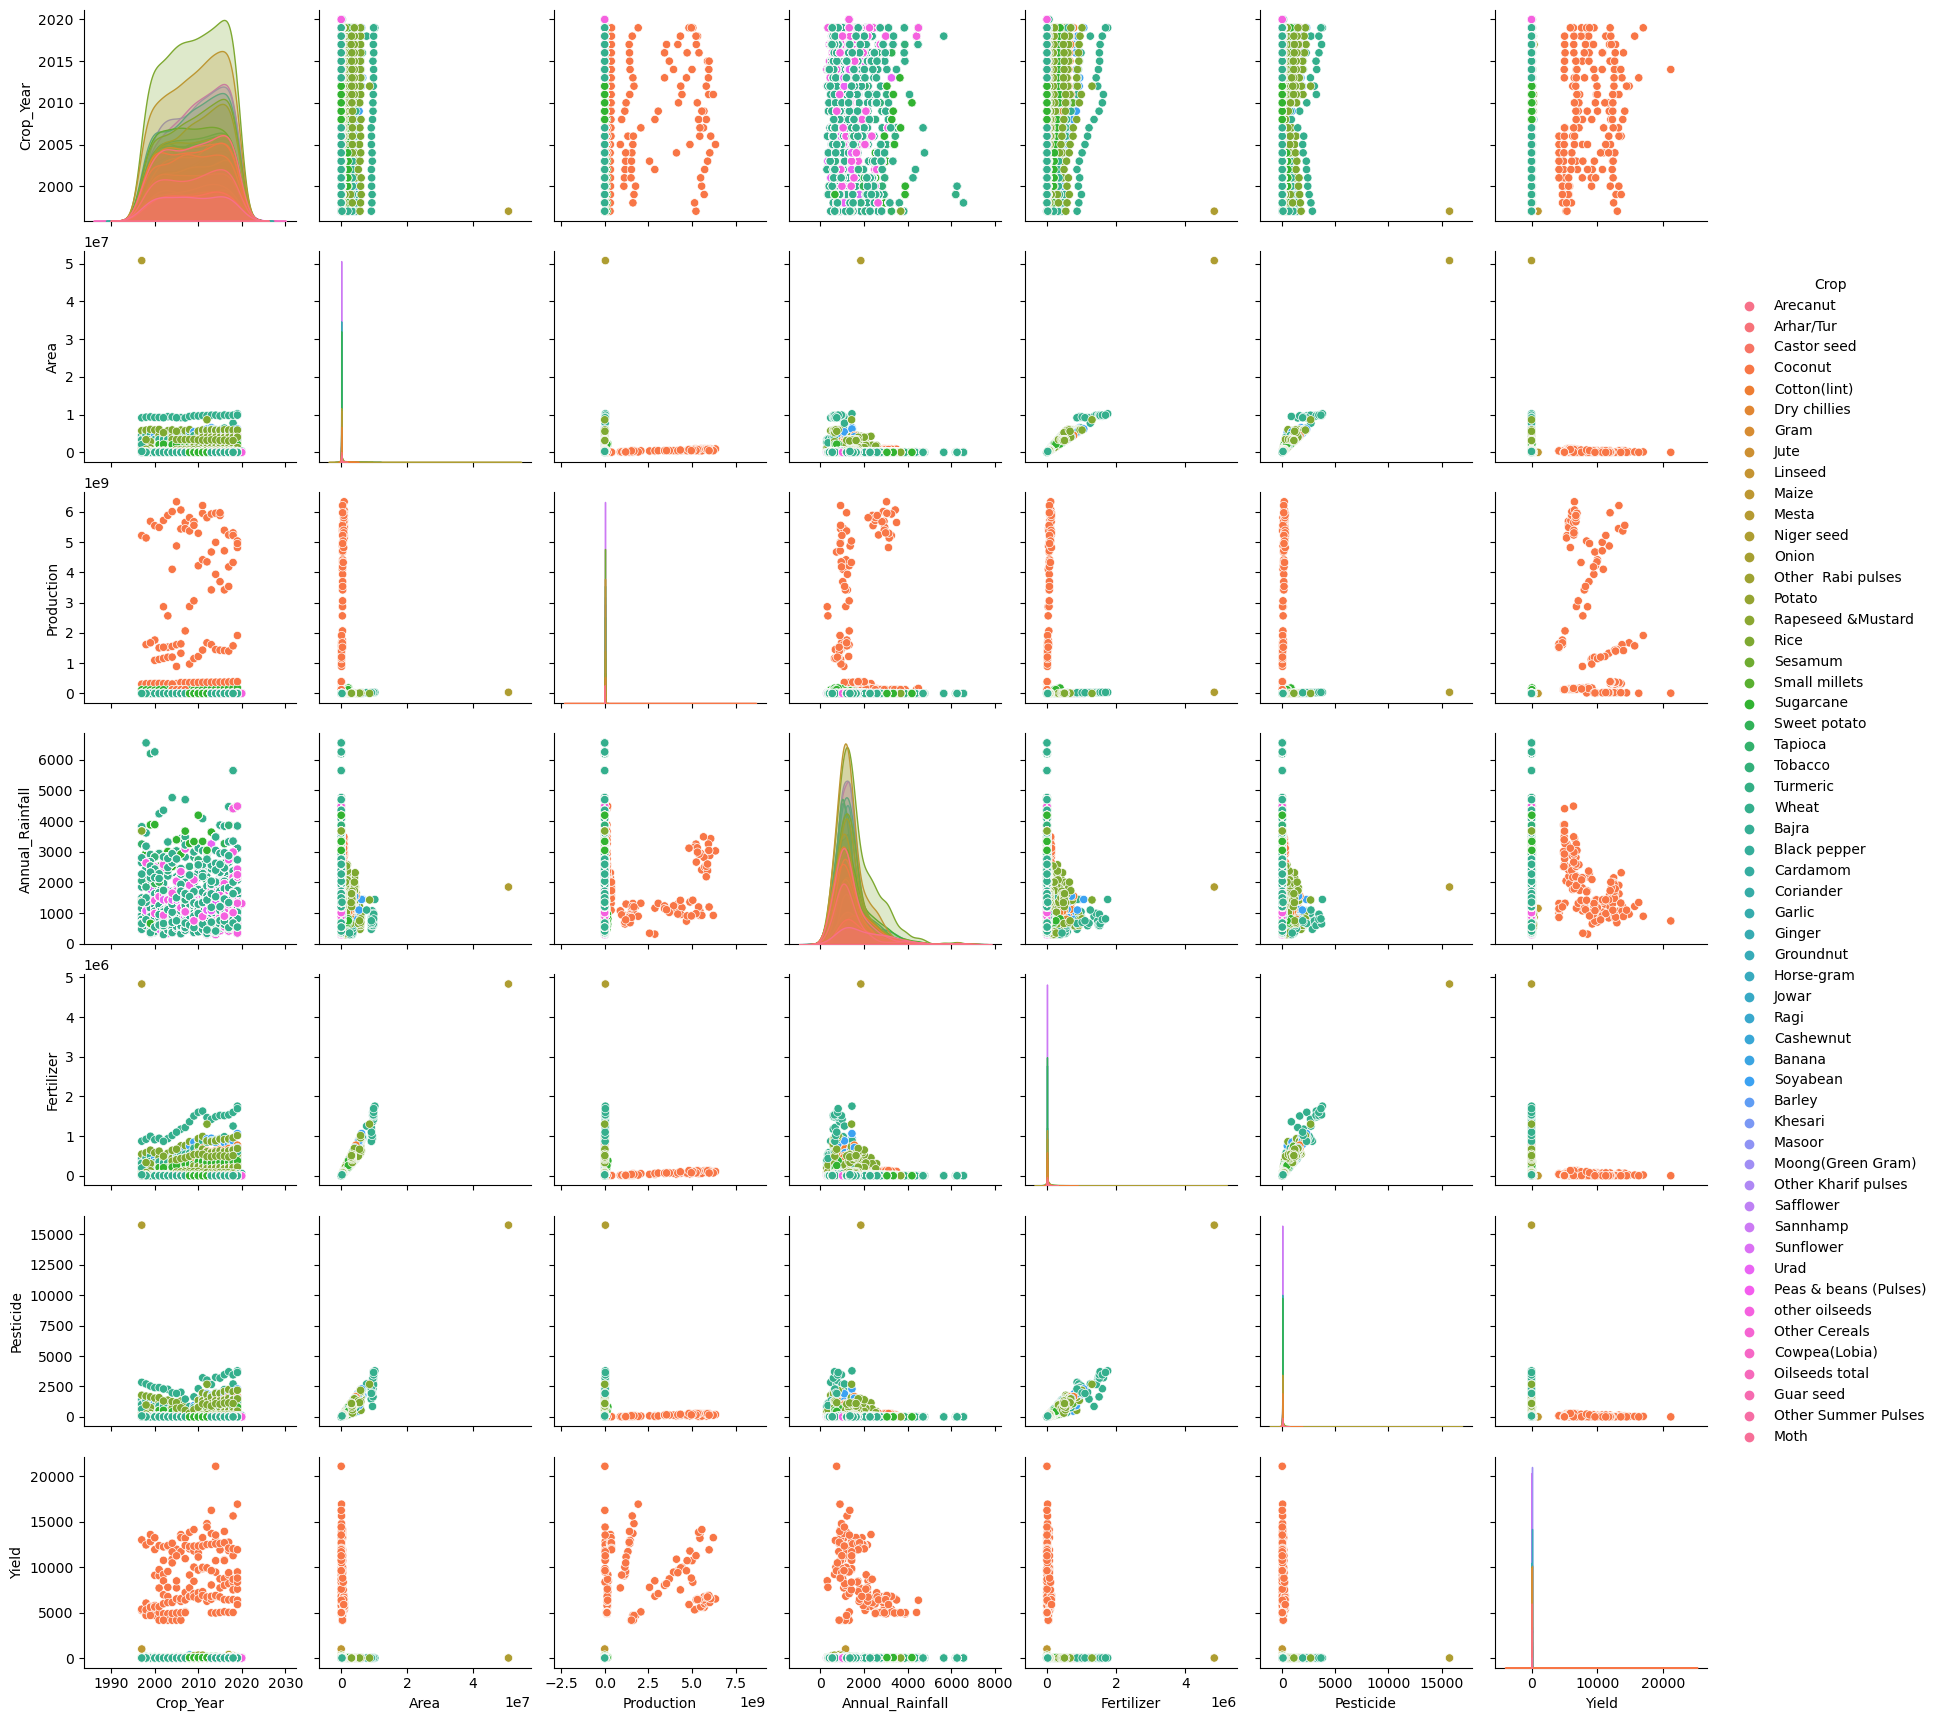

In [14]:
sns.pairplot(df, hue='Crop')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

#df[Season] = LabelEncoder(Season).fit_transform(df[Season])
label_encoders = {}
for col in ['Crop', 'Season', 'State']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
print(df.head(5))

   Crop  Crop_Year  Season  State     Area  Production  Annual_Rainfall  \
0     0       1997       2      2  73814.0       56708           2051.4   
1     1       1997       0      2   6637.0        4685           2051.4   
2     8       1997       0      2    796.0          22           2051.4   
3     9       1997       2      2  19656.0   126905000           2051.4   
4    11       1997       0      2   1739.0         794           2051.4   

   Fertilizer  Pesticide    Yield  
0     7024.88      22.88     0.80  
1      631.64       2.06     0.71  
2       75.76       0.25     0.24  
3     1870.66       6.09  5238.05  
4      165.50       0.54     0.42  


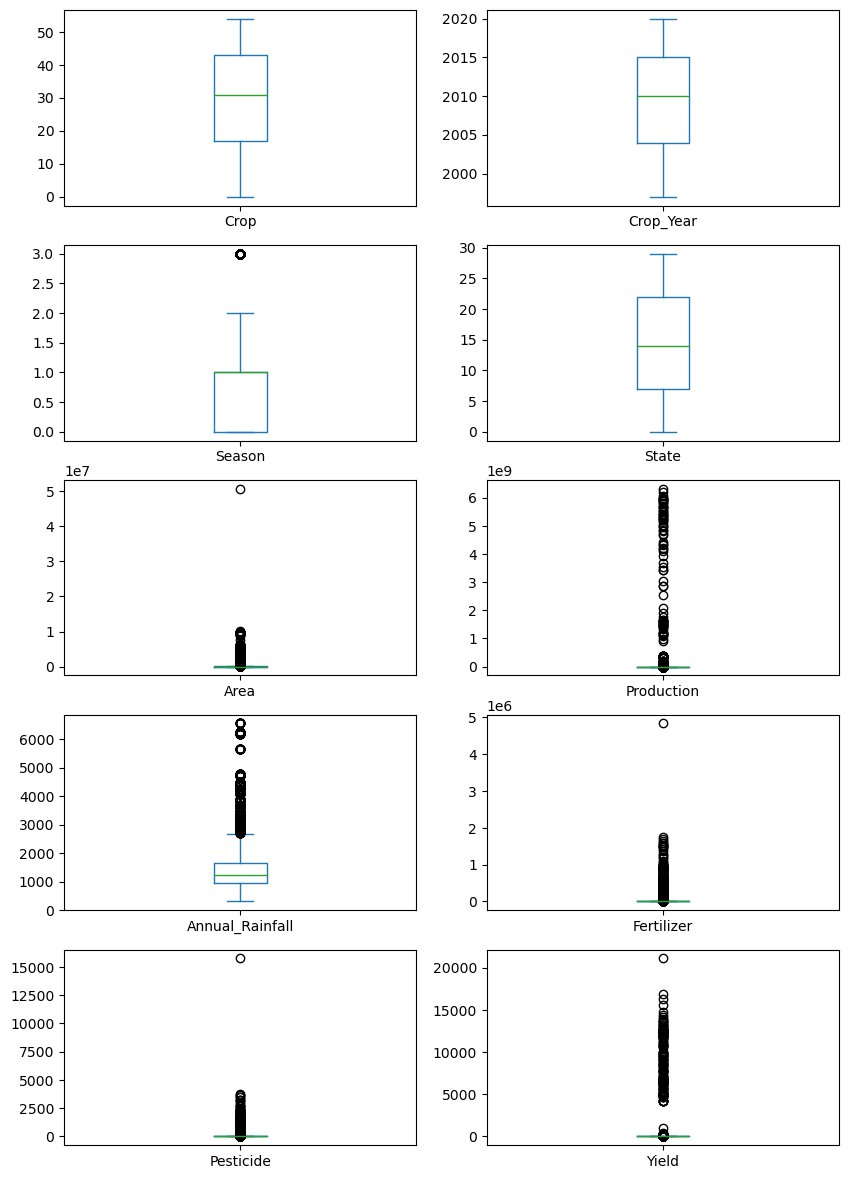

In [16]:
df.plot(kind = "box",subplots = True,layout = (10,2),figsize=(10,30))
plt.show()

In [19]:
def remove_outlier(df , col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df[col] , lower_whisker , upper_whisker)
    return df

def treat_outliers_all(df , col_list):
    for c in col_list:
        df = remove_outlier(df , c)
    return df

In [20]:
df= treat_outliers_all(df , df.iloc[:,2: ])

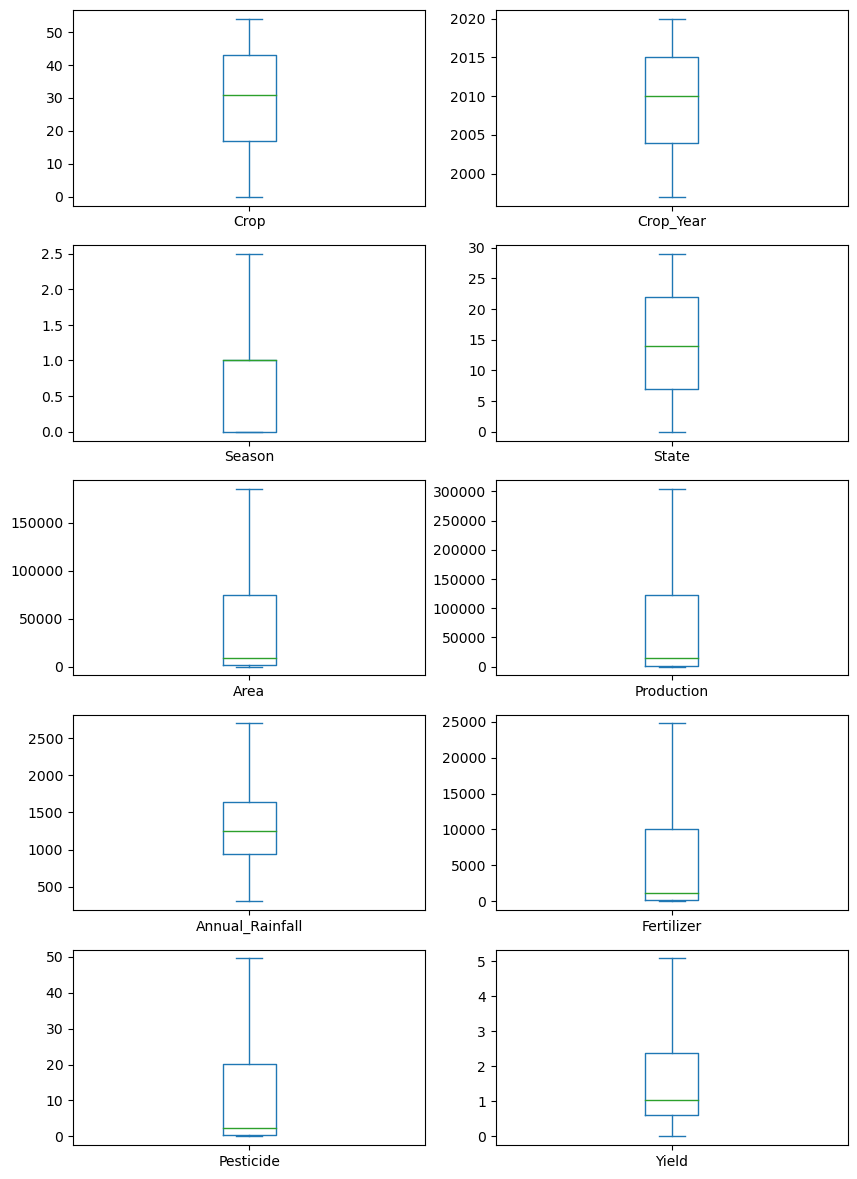

In [21]:
df.plot(kind = "box",subplots = True,layout = (10,2),figsize=(10,30))
plt.show()

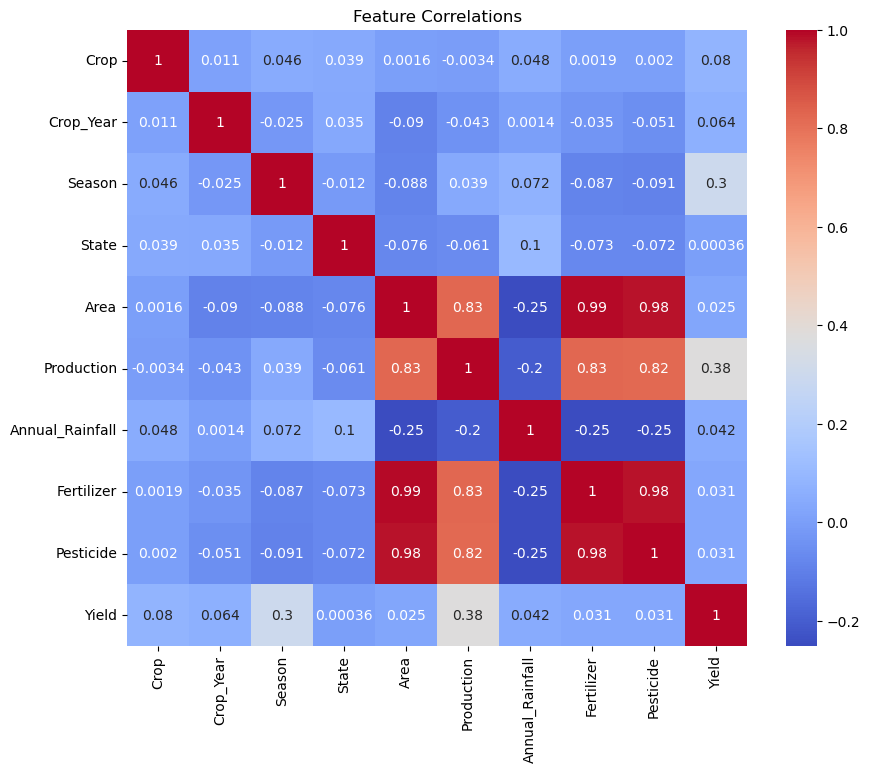

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [23]:
# Features and target variable
X = df.drop(columns=['Yield'])
y = df['Yield']

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = {
    'lr' :LinearRegression(),
    'knn':KNeighborsRegressor(),
    'Dtr':DecisionTreeRegressor(),
    'RF' :RandomForestRegressor()
}
for name, md in models.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)
    
    print(f"{name} : mae : {metrics.mean_absolute_error(y_test,y_pred)} , score : {metrics.r2_score(y_test,y_pred)}")

lr : mae : 0.9377070354044117 , score : 0.43625605345987273
knn : mae : 0.26033671914677503 , score : 0.8905649134050742
Dtr : mae : 0.17121635347892492 , score : 0.9489006347403979
RF : mae : 0.12458892712036636 , score : 0.975174178918711


In [26]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
y_pred

array([4.16765, 1.2424 , 5.06075, ..., 1.538  , 0.6887 , 0.3725 ])

In [29]:
y_test

18238    3.820
6918     1.400
4894     5.075
10960    0.810
15615    0.510
         ...  
8087     5.075
14720    0.360
9234     1.380
19610    0.700
1692     0.450
Name: Yield, Length: 3938, dtype: float64

In [31]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,2.0,2,73814.0,56708.0,2051.4,7024.88,22.88,0.800
1,1,1997,0.0,2,6637.0,4685.0,2051.4,631.64,2.06,0.710
2,8,1997,0.0,2,796.0,22.0,2051.4,75.76,0.25,0.240
3,9,1997,2.0,2,19656.0,304705.5,2051.4,1870.66,6.09,5.075
4,11,1997,0.0,2,1739.0,794.0,2051.4,165.50,0.54,0.420


In [32]:
# Predictions
y_pred = model.predict([[0,1997,2,2,73814,56708,2051.4,7024.88,22.88]])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.8069])

In [33]:
y_pred = model.predict([[1,1997,0,2,6637,4685,2051.4,631.64,2.06]])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.7374])

In [34]:
y_pred = model.predict([[8,1997,0,2,796,22,2051.4,75.76,0.25]])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.1824])